<a href="https://colab.research.google.com/github/prajwalan01/Retail_Sales_Prediction/blob/main/Retails_Sales_Prediction_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Retail Sales Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -*Prajwal Andure*
##### **Team Member 2 -*Rushikesh Halkanche*


# **Project Summary -**

This dataset is a live dataset of Roseman Stores. On analsysing this problem we observe that Roseman problem is a regression problem and our primarily goal is to predict the sales figures of Roseman problem. In this Notebook we work on following topics
Analysing the Dataset by using Exploratory Data Analysis. Using Exponential Moving Averages analyse Trends and Seasonality in Roseman dataset. Analyse Regression analysis using following prediction analysis, A. Linear Regression Analysis B. Elastic Regression ( Lasso and Ridge Regression). C. Random Forest Regression.
By applying above algorthim we find accuracy of 98% by Xgboost.

# **GitHub Link -**

Prajwal Andure - https://github.com/prajwalan01

Rushikesh Halkanche - https://github.com/Rushikeshhalkanche

# **Problem Statement**


Rossman operates over 3,000 drug stores in 7 European countries. Currently, Rossman store managers are tasked with predicting their daily sales for up to six weeks in advance. Store Sales are influenced by many factors, including promotions, competitions, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quits varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment. Data Description Rossmann Stores Data.csv- historical data including Sales store.csv-supplemental information about the stores Data fields Most of the fields are self-explantory. Id-an Id that represents a (Store, Da,,te) duple within the set Store - a unique Id for each store Sales - the turnover for any given day (Dependent Variable) Coustomers - the number of coustomers on a given day.

# Data **Description**

Rossmann Stores Data.csv - historical data including Sales

store.csv - supplemental information about the stores

# **Data fields**

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

**Id**  an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open **- an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] **bold text** - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import plotly.express as px
import pandas as pd
import ast
import math
import random
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle

### Dataset Loading

In [ ]:
# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

In [ ]:
#Rossmann data
sales_df = pd.read_csv('/content/Rossmann Stores Data.csv')

#Store data
store_df = pd.read_csv('/content/store.csv')


### Dataset Information

In [ ]:
# Dataset Info

In [ ]:
#dataset first view
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0.0,1.0
1,2,5,2015-07-31,6064,625,1,1,0.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0.0,1.0
4,5,5,2015-07-31,4822,559,1,1,0.0,1.0


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55813 entries, 0 to 55812
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          55813 non-null  int64  
 1   DayOfWeek      55813 non-null  int64  
 2   Date           55813 non-null  object 
 3   Sales          55813 non-null  int64  
 4   Customers      55813 non-null  int64  
 5   Open           55813 non-null  int64  
 6   Promo          55813 non-null  int64  
 7   StateHoliday   55812 non-null  float64
 8   SchoolHoliday  55812 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 3.8+ MB


In [ ]:
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
55808,59,4,2015-06-11,4403,491,1,0,0.0,0.0
55809,60,4,2015-06-11,7289,678,1,0,0.0,0.0
55810,61,4,2015-06-11,3446,498,1,0,0.0,0.0
55811,62,4,2015-06-11,5975,708,1,0,0.0,0.0
55812,63,4,2015-06-11,5438,525,1,0,NaN,NaN


In [ ]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,55813.000000,55813.000000,55813.000000,55813.000000,55813.000000,55813.000000,55812.0,55812.000000
mean,557.406267,4.019977,6115.434648,638.912458,0.863150,0.399548,0.0,0.239178
std,322.178896,1.983740,3754.196751,440.827304,0.343692,0.489810,0.0,0.426585
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,278.000000,2.000000,4178.000000,436.000000,1.000000,0.000000,0.0,0.000000
50%,557.000000,4.000000,6020.000000,609.000000,1.000000,0.000000,0.0,0.000000
75%,836.000000,6.000000,8106.000000,816.000000,1.000000,1.000000,0.0,0.000000
max,1115.000000,7.000000,41551.000000,4783.000000,1.000000,1.000000,0.0,1.000000


In [ ]:
#change state holiday value a,b,c is equal to 1
sales_df['StateHoliday'].value_counts()

0.0    55812
Name: StateHoliday, dtype: int64

In [ ]:
#change datatype object into data format
sales_df['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11'], dtype=object)

In [ ]:
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     1
SchoolHoliday    1
dtype: int64

In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

# Data Wrangling

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

In [ ]:
#CompetitionDistance - distance in meters to the nearest competitor store

sales_df['SchoolHoliday'].unique()


array([ 1.,  0., nan])

In [ ]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
list1 = ['DayOfWeek','StateHoliday','SchoolHoliday']

for i in list1:
  print(i)
  print(sales_df[i].unique())
  print('-------------------------')


DayOfWeek
[5 4 3 2 1 7 6]
-------------------------
StateHoliday
[ 0. nan]
-------------------------
SchoolHoliday
[ 1.  0. nan]
-------------------------


In [ ]:
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [ ]:
#store dataset fill into null values I.E.0

store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(0)
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(0)


In [ ]:
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:

store_df


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [ ]:
final1 = pd.merge(sales_df, store_df, on = 'Store', how = 'left')

In [ ]:

final1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0.0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0.0,1.0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0.0,1.0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0.0,1.0,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0.0,1.0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55808,59,4,2015-06-11,4403,491,1,0,0.0,0.0,a,c,2840.0,6.0,2007.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
55809,60,4,2015-06-11,7289,678,1,0,0.0,0.0,d,c,5540.0,10.0,2009.0,0,0.0,0.0,0
55810,61,4,2015-06-11,3446,498,1,0,0.0,0.0,a,c,350.0,12.0,2007.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
55811,62,4,2015-06-11,5975,708,1,0,0.0,0.0,a,a,2050.0,0.0,0.0,0,0.0,0.0,0


In [ ]:
print(final1[['StateHoliday', 'Assortment', 'StoreType']].nunique())

StateHoliday    1
Assortment      3
StoreType       4
dtype: int64


In [ ]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55813 entries, 0 to 55812
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      55813 non-null  int64  
 1   DayOfWeek                  55813 non-null  int64  
 2   Date                       55813 non-null  object 
 3   Sales                      55813 non-null  int64  
 4   Customers                  55813 non-null  int64  
 5   Open                       55813 non-null  int64  
 6   Promo                      55813 non-null  int64  
 7   StateHoliday               55812 non-null  float64
 8   SchoolHoliday              55812 non-null  float64
 9   StoreType                  55813 non-null  object 
 10  Assortment                 55813 non-null  object 
 11  CompetitionDistance        55813 non-null  float64
 12  CompetitionOpenSinceMonth  55813 non-null  float64
 13  CompetitionOpenSinceYear   55813 non-null  flo

In [ ]:
final1["Sales"].value_counts()

0        7638
6078       22
5818       20
6231       18
6581       18
         ... 
13004       1
12737       1
14295       1
20808       1
3378        1
Name: Sales, Length: 11934, dtype: int64

In [ ]:
import pandas as pd

# Assuming the date column is in a format like 'YYYY-MM-DD'
try:
    final1['Date'] = pd.to_datetime(final1['Date'], format='%Y-%m-%d')
except ValueError:
    # Handle invalid date values, such as dropping the rows
    final1 = final1.dropna(subset=['Date'])

# Now, 'Date' column should contain valid datetime values.


In [ ]:
final1['CompetitionOpenSinceMonth'] = pd.to_datetime(final1['CompetitionOpenSinceMonth'], format='%Y-%m-%d')


In [ ]:
# code for change object into date format
final1['CompetitionOpenSinceYear'] = final1['CompetitionOpenSinceYear'].astype(int)
final1['Promo2SinceYear'] = final1['Promo2SinceYear'].astype(int)


In [ ]:
# code for change float into integer
final1['CompetitionDistance'] = final1['CompetitionDistance'].astype(int)
final1['Promo2SinceWeek'] = final1['Promo2SinceWeek'].astype(int)



In [ ]:

final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55813 entries, 0 to 55812
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      55813 non-null  int64         
 1   DayOfWeek                  55813 non-null  int64         
 2   Date                       55813 non-null  datetime64[ns]
 3   Sales                      55813 non-null  int64         
 4   Customers                  55813 non-null  int64         
 5   Open                       55813 non-null  int64         
 6   Promo                      55813 non-null  int64         
 7   StateHoliday               55812 non-null  float64       
 8   SchoolHoliday              55812 non-null  float64       
 9   StoreType                  55813 non-null  object        
 10  Assortment                 55813 non-null  object        
 11  CompetitionDistance        55813 non-null  int64         
 12  Comp

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

In [ ]:

final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0.0,1.0,c,a,1270,1970-01-01 00:00:00.000000009,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0.0,1.0,a,a,570,1970-01-01 00:00:00.000000011,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0.0,1.0,a,a,14130,1970-01-01 00:00:00.000000012,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0.0,1.0,c,c,620,1970-01-01 00:00:00.000000009,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0.0,1.0,a,a,29910,1970-01-01 00:00:00.000000004,2015,0,0,0,0


In [ ]:
# Dataset Describe

In [ ]:
final1.describe().apply(lambda x: round(x, 2))


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,55813.00,55813.00,55813.00,55813.00,55813.00,55813.00,55812.0,55812.00,55813.00,55813.00,55813.00,55813.00,55813.00
mean,557.41,4.02,6115.43,638.91,0.86,0.40,0.0,0.24,5389.33,1371.19,0.51,12.08,1030.34
std,322.18,1.98,3754.20,440.83,0.34,0.49,0.0,0.43,7653.49,934.96,0.50,15.54,1005.59
min,1.00,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
25%,278.00,2.00,4178.00,436.00,1.00,0.00,0.0,0.00,710.00,0.00,0.00,0.00,0.00
50%,557.00,4.00,6020.00,609.00,1.00,0.00,0.0,0.00,2320.00,2006.00,1.00,1.00,2009.00
75%,836.00,6.00,8106.00,816.00,1.00,1.00,0.0,0.00,6880.00,2011.00,1.00,22.00,2012.00
max,1115.00,7.00,41551.00,4783.00,1.00,1.00,0.0,1.00,75860.00,2015.00,1.00,50.00,2015.00


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Plot between Sales and Competition Open Since year

In [ ]:
# Chart - 1 visualization code

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

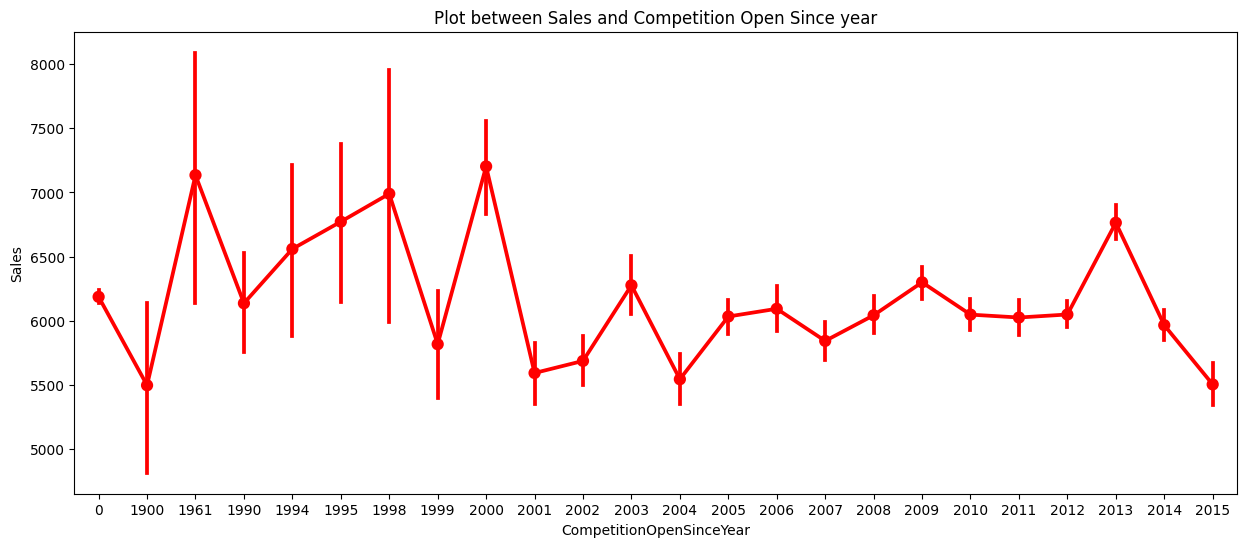

In [ ]:

plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= "Sales", data=final1, color="Red")
sns.set_style("dark")
plt.title('Plot between Sales and Competition Open Since year')

##### 1. Why did you pick the specific chart?

This chart can help you understand how the opening year of competition relates to the sales of your business.

##### 2. What is/are the insight(s) found from the chart?

From this chart we get insights that Sales is Highest During the Year 1900 because for that time there are limited number of Stores, hence the competition is very low. But as year pass,no of stores get increased that means Competition also increased accordignly, hence Sales got Decline year by year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By observing the trend, you can make inferences about how competition impacted sales over the years. For example, if you see a decline in sales after competition opened in certain years, it might suggest that increased competition had a negative impact on your business.


#### Chart - 2: Plot between Sales and Promo2SinceYear

In [ ]:
# Chart - 2 visualization code

Text(0.5, 1.0, 'Plot between Sales and Promo2SinceYear')

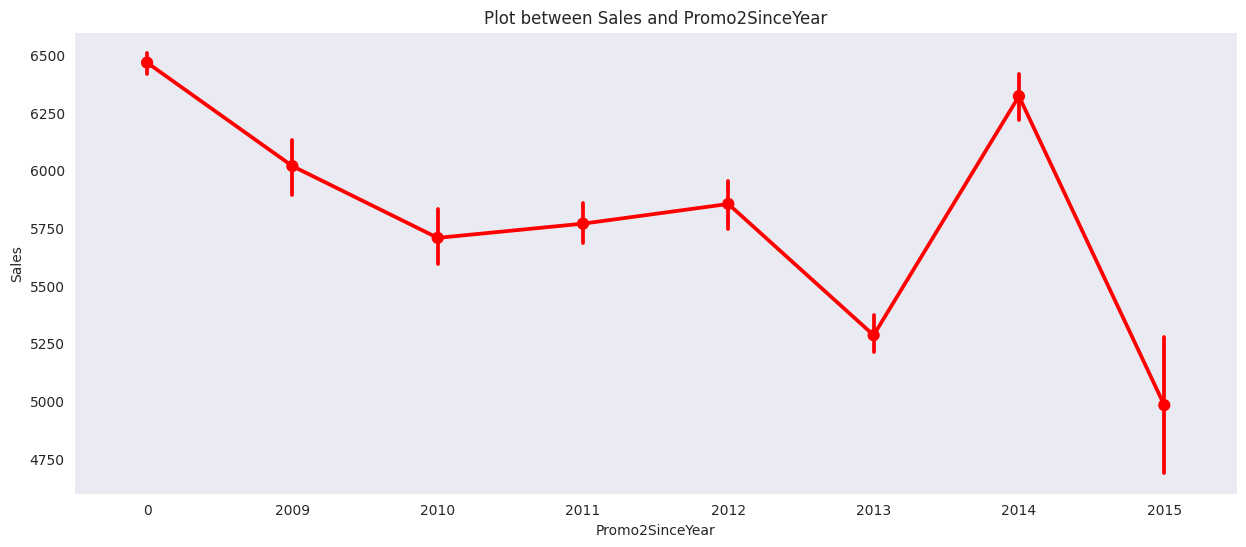

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=final1, color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and Promo2SinceYear')


##### 1. Why did you pick the specific chart?

This chart can help you understand how the opening year of competition relates to the sales of your business.

##### 2. What is/are the insight(s) found from the chart?

From This Graph We saw that sales of stores is effected which continues their promotion. The Sales in 2013 and 2015 are very low inspite of promotion. The reason can be more competiton year by year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Trend Analysis: By observing the trend in the chart, you can determine how the introduction of Promo2 in different years impacted sales. For example, if you see an upward trend in sales after the introduction of Promo2, it suggests that the promotional campaign has a positive impact on sales.

#### Chart - 3: Plot between Sales and CompetitionOpenSinceMonth

In [ ]:
# Chart - 3 visualization code

Text(0.5, 1.0, 'Plot between Sales and CompetitionOpenSinceMonth ')

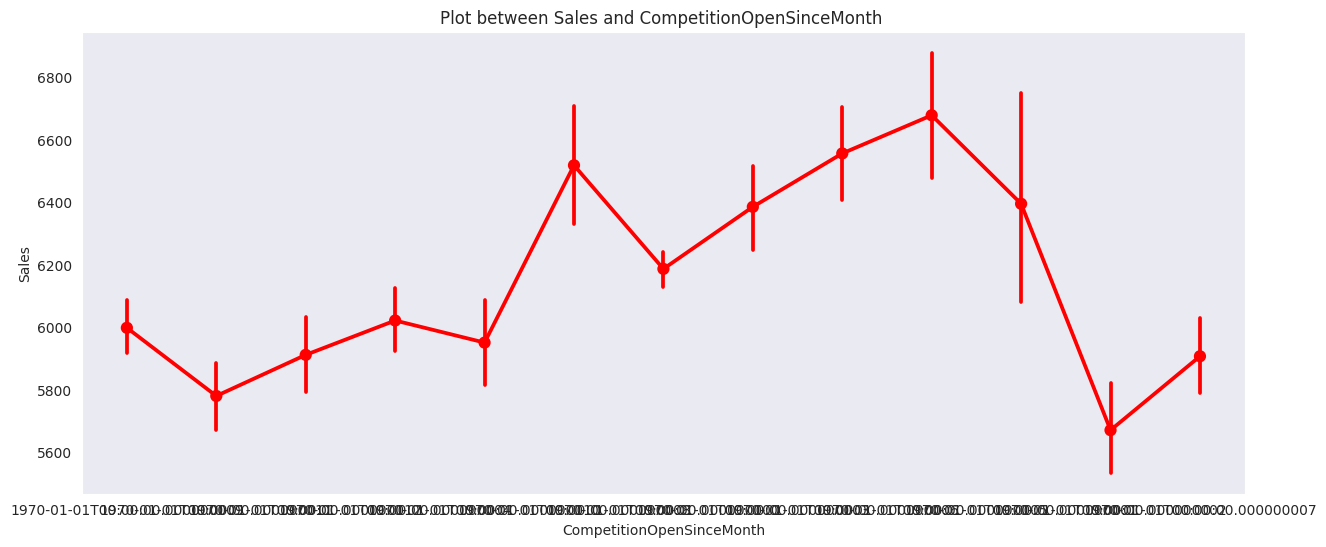

In [ ]:

plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=final1,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and CompetitionOpenSinceMonth ')

##### 1. Why did you pick the specific chart?

ine plot that shows the relationship between two variables: 'Sales' (on the y-axis) and 'CompetitionOpenSinceMonth' (on the x-axis). It can help you understand how the month in which competition opened relates to the sales of your business.

##### 2. What is/are the insight(s) found from the chart?

Variability: The chart may show variability in sales for each month of competition opening. Some months may have consistent sales, while others may have more fluctuation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Negative Impact: Conversely, if you observe a downward trend in sales as 'CompetitionOpenSinceMonth' increases, it might suggest a negative impact. This could mean that competition opening later in the year has a detrimental effect on your business's sales.

#### Chart - 4: BOX PLOT

In [ ]:
# Chart - 4 visualization code

Text(0.5, 1.0, 'Boxplot for Sales Values')

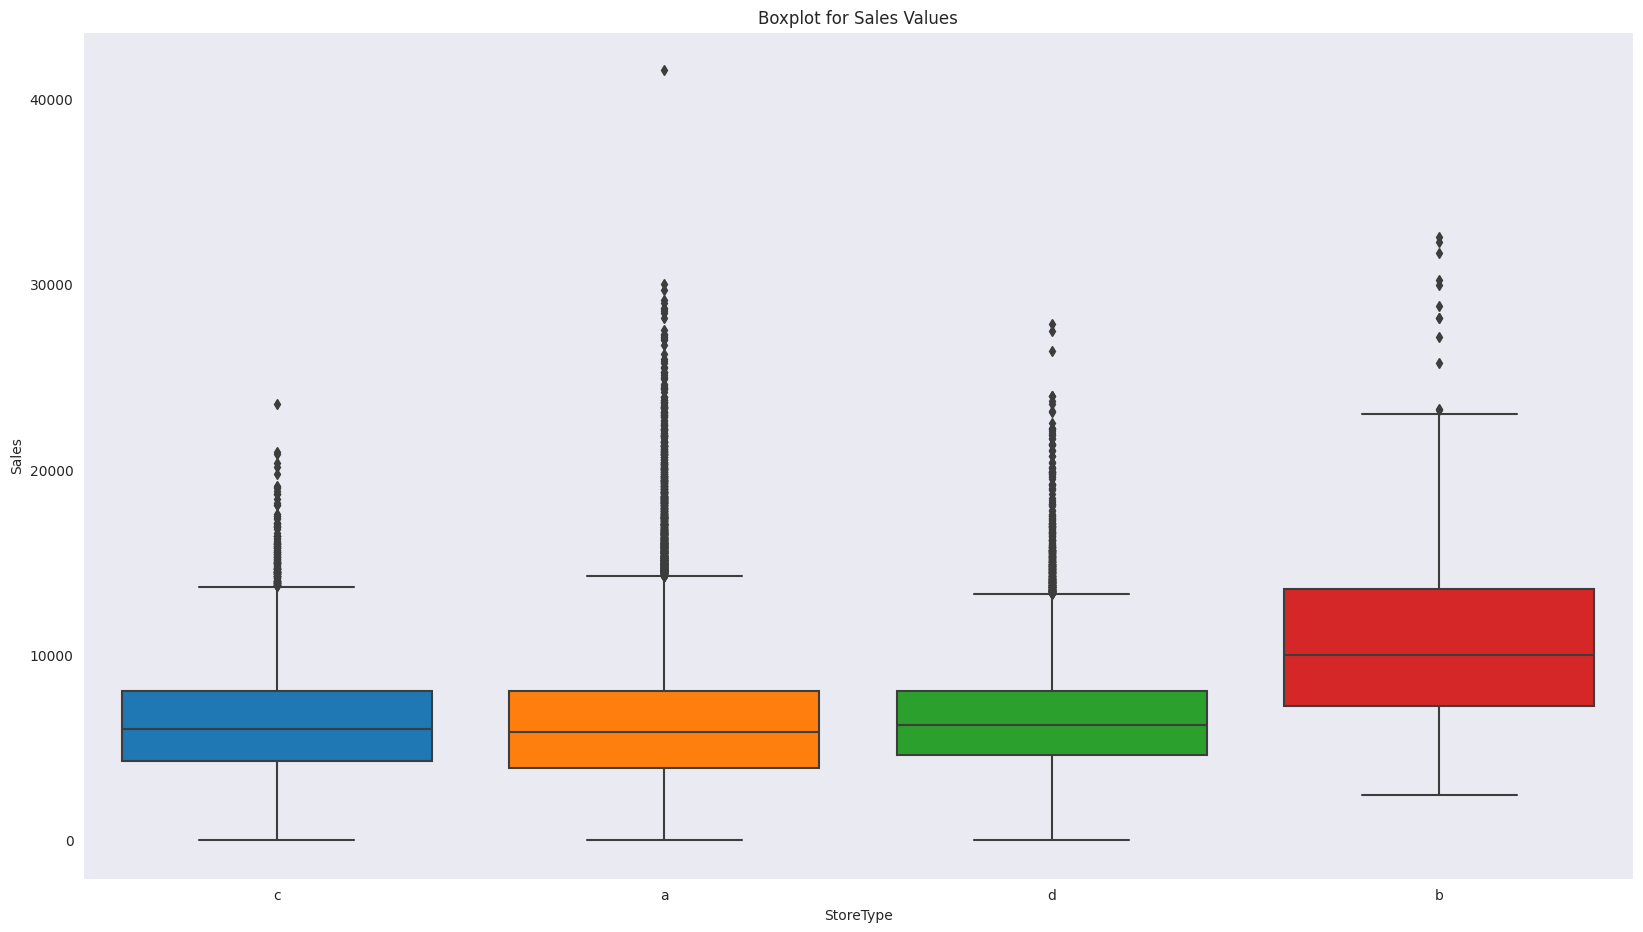

In [ ]:
plt.figure(figsize=(20, 11))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=final1, saturation=1.5,width=0.8)
plt.title('Boxplot for Sales Values')


##### 1. Why did you pick the specific chart?

A box plot is used to visualize the distribution of a dataset and identify the presence of outliers or extreme values in a concise and easy-to-understand manner.

##### 2. What is/are the insight(s) found from the chart?

Box: The box in the plot represents the interquartile range (IQR), which contains the middle 50% of the data. The top edge of the box is the third quartile (Q3), and the bottom edge is the first quartile (Q1). The height of the box (Q3 - Q1) indicates the spread of the middle 50% of the data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Sales Distribution: The boxplot allows you to see the distribution of sales for each store type. You can compare the central tendency (median) and the spread (IQR) of sales among different store types.

#### Chart - 5: Boxplot for Sales Values on the basis of Assortment

In [ ]:
# Chart - 5 visualization code

Text(0.5, 1.0, 'Boxplot for Sales Values on the basis of Assortment')

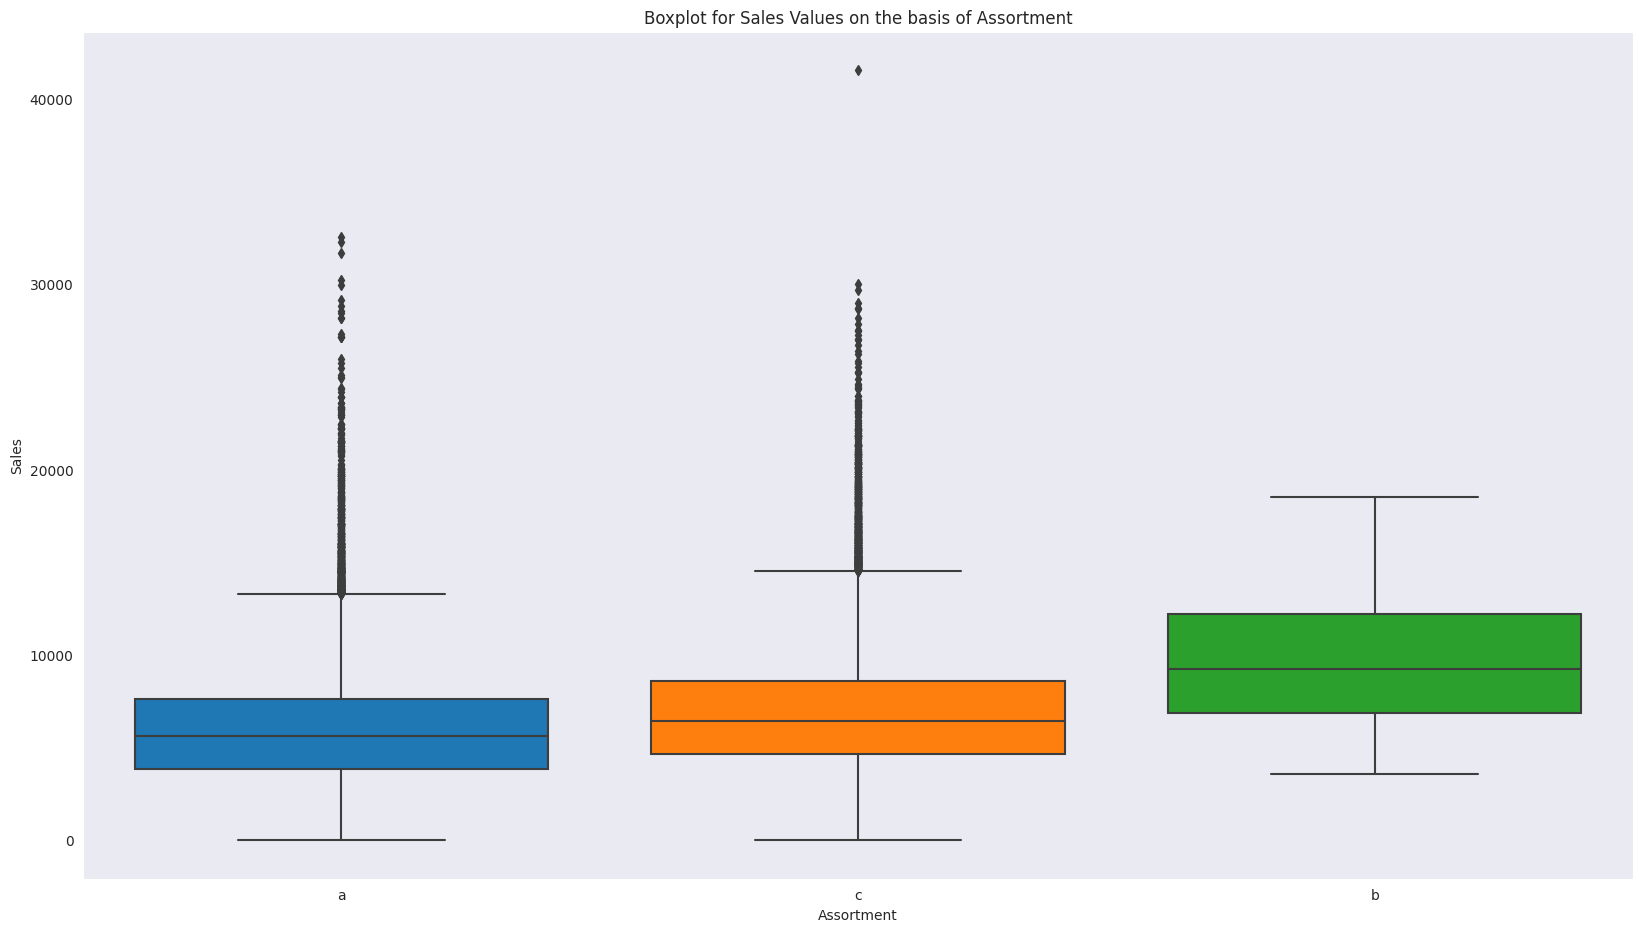

In [ ]:
plt.figure(figsize=(20, 11))
plot_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=final1, saturation=1.5,width=0.8)
plt.title('Boxplot for Sales Values on the basis of Assortment')

##### 1. Why did you pick the specific chart?

A box plot is used to visualize the distribution of a dataset and identify the presence of outliers or extreme values in a concise and easy-to-understand manner.

##### 2. What is/are the insight(s) found from the chart?

Whiskers: The whiskers extend from the box and show the range of the data within a certain distance from the quartiles. Typically, the whiskers extend to the minimum and maximum values within 1.5 times the IQR. Data points beyond the whiskers are considered outliers and are plotted individually as dots

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Strategic Decisions: Based on the boxplot, you can make strategic decisions about product assortment. If one assortment category consistently has higher sales, you might consider expanding or promoting products in that category. Conversely, if another category has consistently lower sales, you might investigate ways to improve sales within that assortment.

#### Chart - 6: Store Daily Open Countplot

In [ ]:
# Chart - 6 visualization code

Text(0.5, 1.0, 'Store Daily Open Countplot')

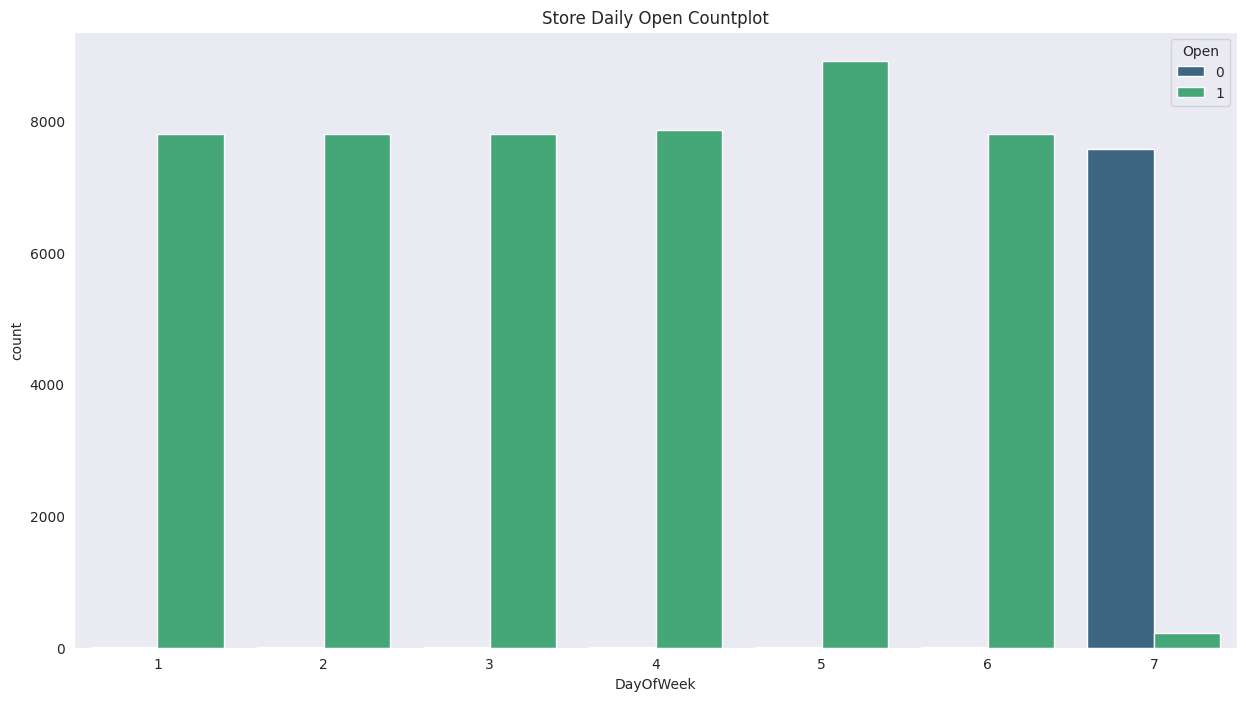

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x= 'DayOfWeek', hue='Open', data= final1, palette='viridis')
plt.title('Store Daily Open Countplot')


##### 1. Why did you pick the specific chart?

The purpose of this chart is to visualize the distribution of store openings and closures across different days of the week.

##### 2. What is/are the insight(s) found from the chart?

in this chart we get that mostly saturday and sunday maximumly store open obviously due to weekend so customers are doing shopping.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

You can quickly see which days of the week have the highest number of store openings and closures.
For business planning, this chart can help in scheduling staffing, inventory management, and store operations.

#### Chart - 7: store Daily Promo Countplot

In [ ]:
# Chart - 7 visualization code

Text(0.5, 1.0, 'store Daily Promo Countplot')

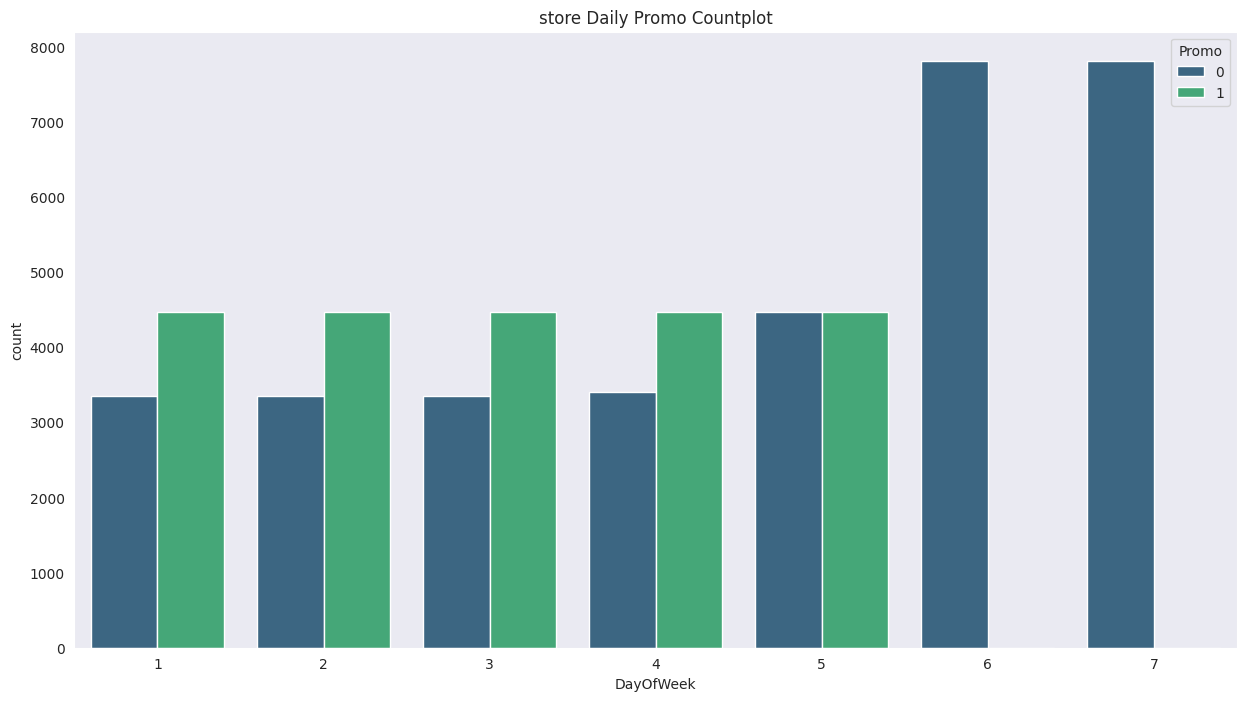

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x= 'DayOfWeek',hue='Promo',data= final1,palette='viridis')
plt.title('store Daily Promo Countplot')

##### 1. Why did you pick the specific chart?

The purpose of this chart is to visualize the distribution of store openings and closures across different days of the week.



##### 2. What is/are the insight(s) found from the chart?

saturday and sunday is weekend so everyone is going to buy something so obviously this two day we are doing more promotion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights from this chart can be used for strategic planning. For example, if you notice that certain days have consistently higher promotional activity and those days also tend to have higher sales, it may indicate that promotions are driving sales on those days.

#### Chart - 8: promo

In [ ]:
# Chart - 8 visualization code

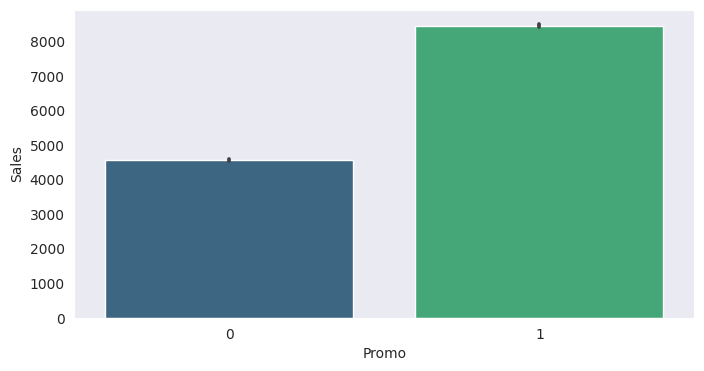

In [ ]:
plt.figure(figsize=(8, 4))
promo_sales = sns.barplot(x="Promo", y="Sales", data=final1, palette='viridis')



##### 1. Why did you pick the specific chart?

The purpose of this chart is to compare the average sales of stores when they have promotions (Promo = 1) versus when they don't have promotions (Promo = 0).

##### 2. What is/are the insight(s) found from the chart?

Here O represents the store which didnt opt for promotion and 1 represents for stores who opt for promotion. Those store who took promotions their sales are high as compared to stores who didnt took promotion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact: If the average sales for stores with promotions are significantly higher than for stores without promotions, it suggests that promotions have a positive impact on sales. Conversely, if there is little difference or if stores with promotions have lower sales, it may indicate that promotions are not effective or that there are other factors at play.

# **State Holiday**
0 = public holiday, 1 = Easter holiday, 2 = Christmas, 3 = None

#### Chart - 9:state holiday

In [ ]:
# Chart - 9 visualization code

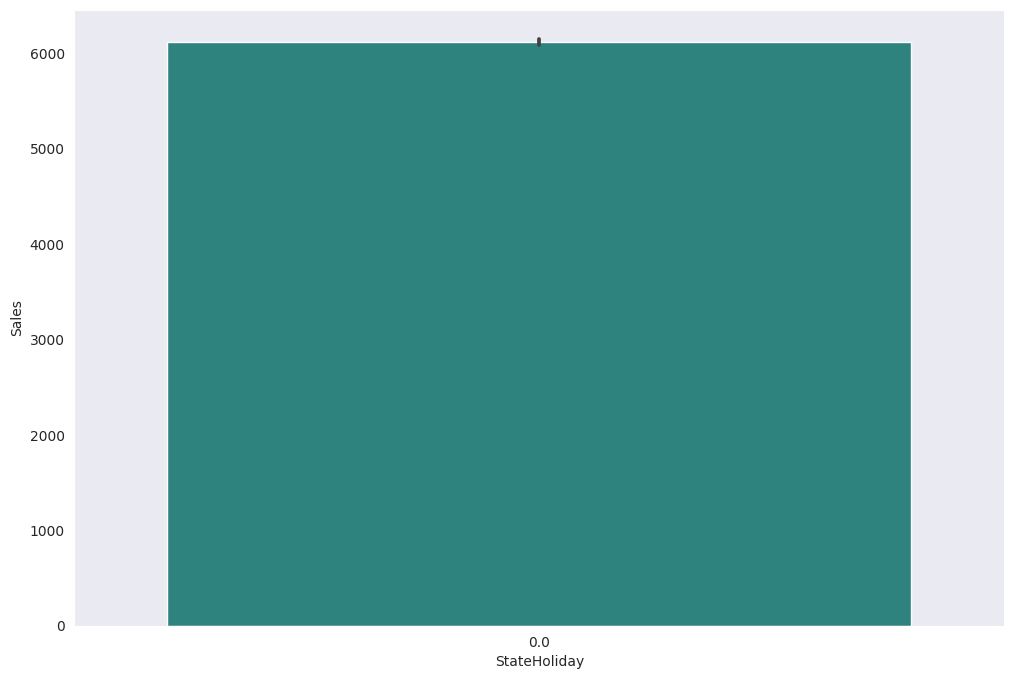

In [ ]:
plt.figure(figsize=(12, 8))
stateholiday_sales = sns.barplot (x="StateHoliday", y="Sales", data=final1, palette='viridis')


##### 1. Why did you pick the specific chart?

The purpose of this chart is to compare the average sales of stores during different types of state holidays.

##### 2. What is/are the insight(s) found from the chart?

The x-axis represents the different categories of state holidays (e.g., "0" for no holiday, "a" for public holiday, "b" for Easter holiday, "c" for Christmas holiday).

The y-axis represents the average sales for each category of state holiday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



If you notice that Christmas holidays have a substantial positive impact on sales, you might consider running special promotions or extending store hours during that time.

#### Chart - 10:School Holiday
0 = 'Not Holiday' , 1 = 'Holiday'

In [ ]:
# Chart - 10 visualization code

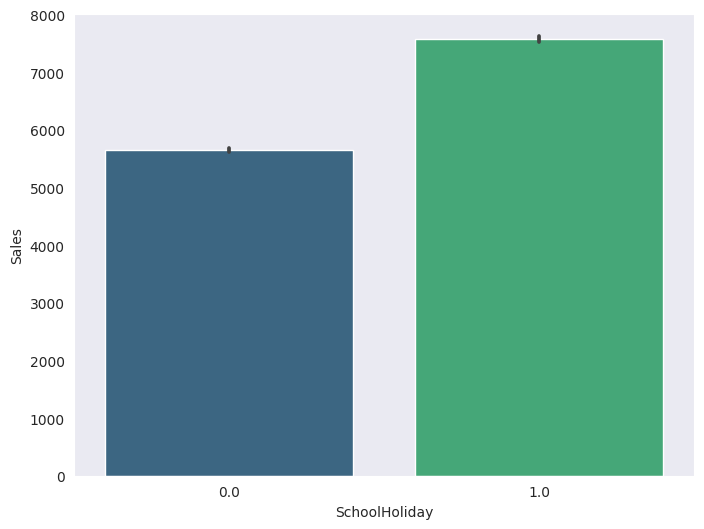

In [ ]:
plt.figure(figsize=(8, 6))
stateholiday_sales = sns.barplot (x="SchoolHoliday", y="Sales", data=final1, palette='viridis')

##### 1. Why did you pick the specific chart?

The purpose of this chart is to compare the average sales of stores during school holidays and non-school holidays.

##### 2. What is/are the insight(s) found from the chart?

We can observe that most of the stores remain closed during State and Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays. Another important thing to note is that the stores which were opened during School holidays had more sales than normal.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Depending on the observed differences in sales, you can make informed decisions regarding staffing, inventory management, and promotional activities during school holidays

## **Conclusion of EDA**

1. From plot sales and competition Open Since Month shows sales go increasing from November and highest in month December.  
2.  From plot Sales and day of week, Sales highest on Monday and start declining from Tuesday to Saturday and on Sunday Sales almost near to zero.



3.   Plot between Promotion and Sales shows that promotion helps in increasing Sales.

4. ype of Store plays an important role in opening pattern of stores.
5. All Type 'b' stores never closed except for refurbishment or other reason.



6.  All Type 'b' stores have comparatively higher sales and it mostly constant with peaks appears on weekends.
7.  ssortment Level 'b' is only offered at Store Type 'b'
8. We can observe that most of the stores remain closed during State Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays.







# **6-Feature Engineering & Data Pre-processing**

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

<ipython-input-61-86cd10e49880>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = final1.corr()


<Axes: >

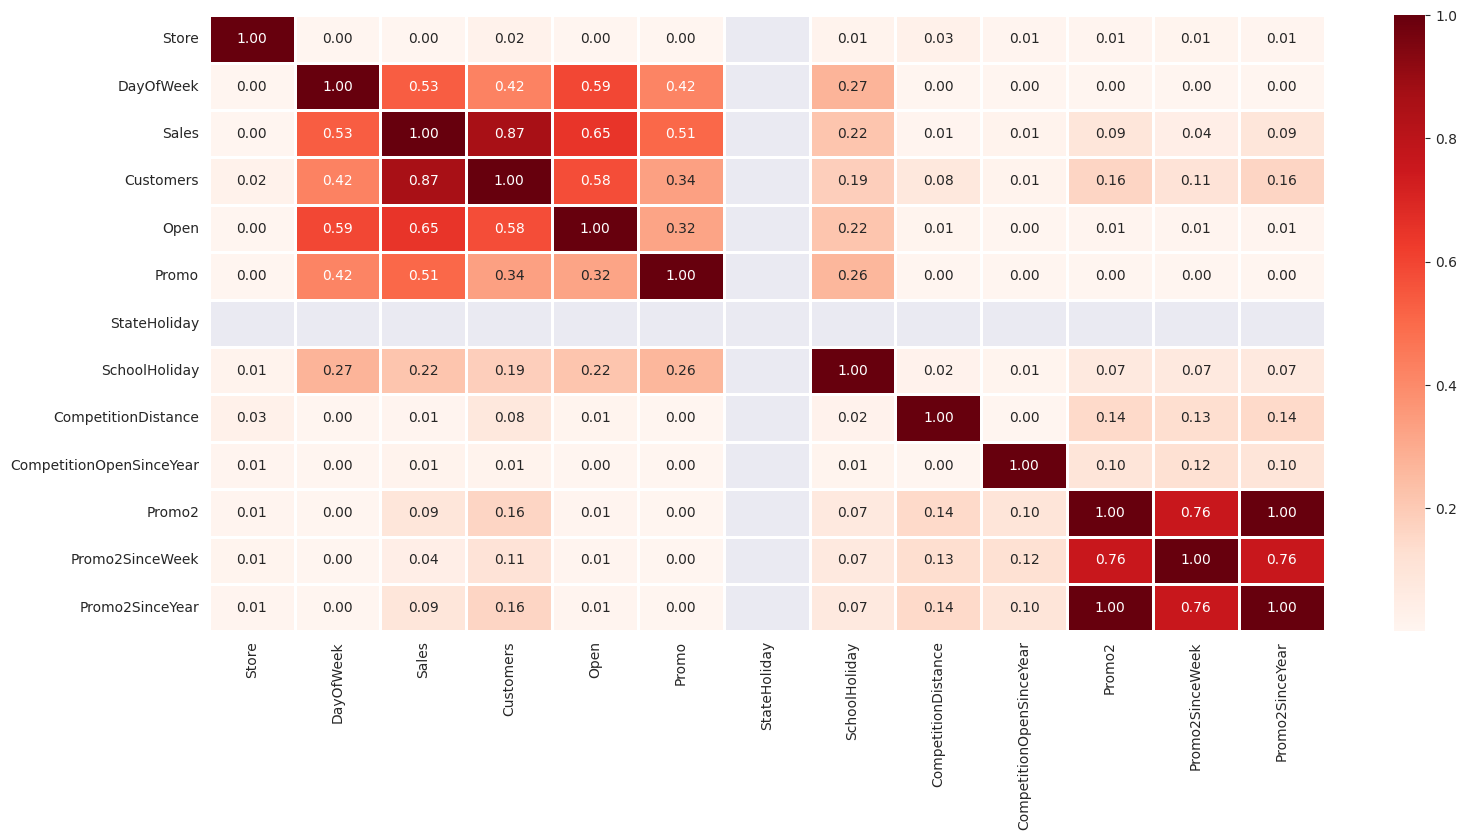

In [ ]:
plt.figure(figsize=(18,8))
correlation = final1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Reds', linewidths=2, fmt=".2f")

##### 1. Why did you pick the specific chart?

A correlation heatmap is used to quickly visualize and assess the strength and direction of relationships (correlations) between multiple variables in a dataset. Its purpose is to:

Identify Relationships: Show which variables are positively or negatively correlated with each other.

Strength of Relationships: Indicate the strength of these correlations using color intensity or values.

##### 2. What is/are the insight(s) found from the chart?

The color of the cell indicates the direction and strength of the correlation: a positive correlation is indicated by a warm color (such as Red) and a negative correlation is indicated by a cool color (such as Orange). The intensity of the color represents the strength of the correlation.

# **Multicollinearity**
Multicollinearity is a statistical term that refers to the situation where two or more predictor variables in a regression model are highly correlated with each other.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [ ]:
vif_data = final1.select_dtypes(include=['int64', 'float64'])


In [ ]:
# Display the VIF DataFrame
print(vif_data)

       Store  DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
0          1          5   5263        555     1      1           0.0   
1          2          5   6064        625     1      1           0.0   
2          3          5   8314        821     1      1           0.0   
3          4          5  13995       1498     1      1           0.0   
4          5          5   4822        559     1      1           0.0   
...      ...        ...    ...        ...   ...    ...           ...   
55808     59          4   4403        491     1      0           0.0   
55809     60          4   7289        678     1      0           0.0   
55810     61          4   3446        498     1      0           0.0   
55811     62          4   5975        708     1      0           0.0   
55812     63          4   5438        525     1      0           NaN   

       SchoolHoliday  CompetitionDistance  CompetitionOpenSinceYear  Promo2  \
0                1.0                 1270               

In above table we can see that VIF(Variance Inflation Factor) value for column Promo2 and Promo2Since Year is Higher .So we will drop either Promo2 or Promo2Since Year and again check VIF value. Here we drop Promo2 column.

VIF factor below 10 is look good for Machine Learning Model.

# **Analysis of Target Variable i.e 'Sales'.**

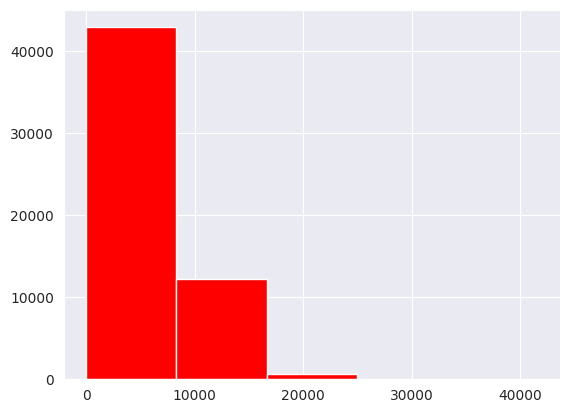

In [ ]:
pd.Series(final1['Sales'],).hist(bins=5, color="red")
plt.show()


In [ ]:
final1[(final1.Open == 0) & (final1.Sales == 0)].count()[0]


7638

So we will drop thoose store which sales is 0 assuming that the stores were closed temoprarily and this will help to train the model more accurately.



In [ ]:
new_df = final1.drop(final1[(final1.Open == 0) & (final1.Sales == 0)].index)

In [ ]:

new_df.shape

(48175, 18)

In [ ]:

new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0.0,1.0,c,a,1270,1970-01-01 00:00:00.000000009,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0.0,1.0,a,a,570,1970-01-01 00:00:00.000000011,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0.0,1.0,a,a,14130,1970-01-01 00:00:00.000000012,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0.0,1.0,c,c,620,1970-01-01 00:00:00.000000009,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0.0,1.0,a,a,29910,1970-01-01 00:00:00.000000004,2015,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55808,59,4,2015-06-11,4403,491,1,0,0.0,0.0,a,c,2840,1970-01-01 00:00:00.000000006,2007,1,14,2011,"Jan,Apr,Jul,Oct"
55809,60,4,2015-06-11,7289,678,1,0,0.0,0.0,d,c,5540,1970-01-01 00:00:00.000000010,2009,0,0,0,0
55810,61,4,2015-06-11,3446,498,1,0,0.0,0.0,a,c,350,1970-01-01 00:00:00.000000012,2007,1,1,2012,"Jan,Apr,Jul,Oct"
55811,62,4,2015-06-11,5975,708,1,0,0.0,0.0,a,a,2050,1970-01-01 00:00:00.000000000,0,0,0,0,0


In new_df dataset,column name 'Promolnterval' change into dummies it means that each new column will have a binary value (0 or 1).

In [ ]:
new_df = pd.get_dummies(new_df, columns=['PromoInterval'])

In [ ]:

new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0.0,1.0,c,...,1270,1970-01-01 00:00:00.000000009,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0.0,1.0,a,...,570,1970-01-01 00:00:00.000000011,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0.0,1.0,a,...,14130,1970-01-01 00:00:00.000000012,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0.0,1.0,c,...,620,1970-01-01 00:00:00.000000009,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0.0,1.0,a,...,29910,1970-01-01 00:00:00.000000004,2015,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55808,59,4,2015-06-11,4403,491,1,0,0.0,0.0,a,...,2840,1970-01-01 00:00:00.000000006,2007,1,14,2011,0,0,1,0
55809,60,4,2015-06-11,7289,678,1,0,0.0,0.0,d,...,5540,1970-01-01 00:00:00.000000010,2009,0,0,0,1,0,0,0
55810,61,4,2015-06-11,3446,498,1,0,0.0,0.0,a,...,350,1970-01-01 00:00:00.000000012,2007,1,1,2012,0,0,1,0
55811,62,4,2015-06-11,5975,708,1,0,0.0,0.0,a,...,2050,1970-01-01 00:00:00.000000000,0,0,0,0,1,0,0,0


In [ ]:
new_df.to_csv('cleandata.csv', index=False)

In [ ]:
final1.to_csv('cleandata.csv', index=False)

## ***5. Hypothesis Testing***

Hypothetical Statement - 1

# MODEL 1 (excluding rows which has sales =0)

Hypothetical Statement-2

# **MODEL 2 (By taking whole Dataset)**

## ***7. ML Model Implementation***

# **MODEL TRAINING**



In [ ]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report


### ML Model - 1:MODEL 1 (excluding rows which has sales =0)

As we have two dataset, first one having sales='0'rows and another exculding it. We will both the data and find the best model.

First we will take dataset excluding Sales='0' rows.

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

In [ ]:
#defining dependent variable
dependent_variables = 'Sales'

#defining independent variable
independent_variables = list(new_df.columns.drop(['Promo2SinceYear','Date','Sales']))


In [ ]:

#list of Independent variable
independent_variables

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [ ]:
#create the data of independent variables
X = new_df[independent_variables].values

#create the data of dependent variables
y = new_df[dependent_variables].values


In [ ]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)


(38540, 18)
(9635, 18)


In [ ]:
pd.get_dummies(LinearRegression)

,<class 'sklearn.linear_model._base.LinearRegression'>
0,1


In [ ]:
X_train.shape

(38540, 18)

In [ ]:
y_train.shape

(38540,)

In [ ]:
print((X_train, y_train))

(array([[734, 6, 276, ..., 0, 0, 1],
       [521, 5, 405, ..., 0, 0, 1],
       [679, 5, 1118, ..., 0, 0, 0],
       ...,
       [104, 3, 1284, ..., 0, 0, 0],
       [1059, 3, 1138, ..., 0, 0, 0],
       [508, 3, 650, ..., 0, 1, 0]], dtype=object), array([ 3231,  4674, 10911, ..., 10398,  9342,  7149]))


In [ ]:
y_test

array([11878,  1347,  2321, ..., 10561,  8061, 16624])

In [ ]:
#Dependent variable with Train Dataset i.e 80%
y_train

array([ 3231,  4674, 10911, ..., 10398,  9342,  7149])

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.5 MB/s eta 0:00:00


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=93b598434da6661f8af775d458086d9803683813c969c2fe7c4f5218d58c9df2
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# **Shape and Lime**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import shap
import lime
import lime.lime_tabular

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
#load the Rossman dataset
data2 = pd.read_csv( "/content/cleandata.csv", low_memory=False)


In [ ]:
problematic_date_row = data2[data2['Date'] == '2014-05-0']
print(problematic_date_row)


Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval]
Index: []


In [ ]:
import pandas as pd

# Assuming 'data2' is your DataFrame
# Locate the row with the problematic date
problematic_date_row = data2[data2['Date'] == '2014-05-0']

# Option 1: Correct the problematic date (if it's a data entry error)
if not problematic_date_row.empty:
    corrected_date = '2014-05-01'  # Corrected date value
    data2.loc[problematic_date_row.index, 'Date'] = corrected_date

# Option 2: Remove the row with the problematic date (if it's an outlier)
# Uncomment the following line to remove the row
# data2 = data2.drop(problematic_date_row.index)

# Now you can proceed with the rest of your code


Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


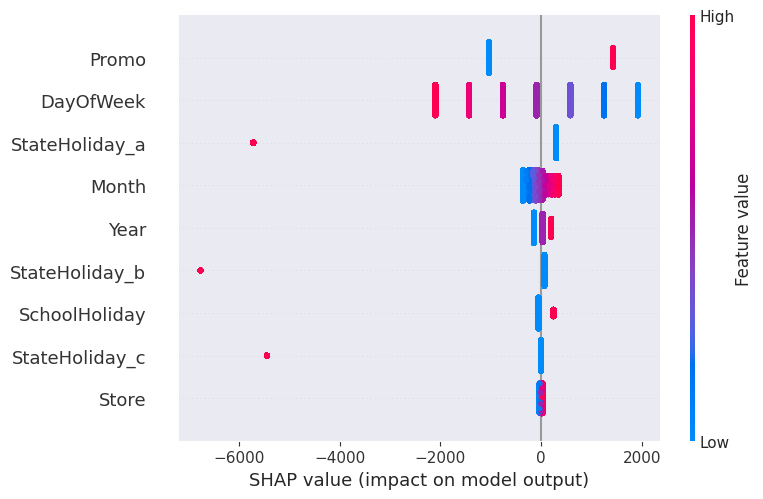

[('4 > 2014.00', 176924.71894923775), ('7 <= 0.00', 37539.59590197752), ('1 > 5.00', -13725.488139578032), ('8 <= 0.00', 11700.038535366288), ('3.00 < 5 <= 6.00', -7110.721032121229), ('2 <= 0.00', -6332.244582359464), ('3 <= 0.00', 5710.920097538714), ('6 <= 0.00', -4903.077621869694), ('558.00 < 0 <= 838.00', -3642.4962181199808)]


X does not have valid feature names, but LinearRegression was fitted with feature names


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# Replace 'data.csv' with the path to your dataset
data2 = pd.read_csv('/content/Rossmann Stores Data.csv')

# Convert the 'Date' column to datetime format
data2['Date'] = pd.to_datetime(data2['Date'])

# Extract year, month, and day of week from 'Date' column
data2['Year'] = data2['Date'].dt.year
data2['Month'] = data2['Date'].dt.month
data2['DayOfWeek'] = data2['Date'].dt.dayofweek

# Select relevant features
features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data2[features], data2['Sales'], test_size=0.2, random_state=42)

# Separate categorical and numeric columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
numeric_columns = X_train.select_dtypes(include=['number']).columns

# Convert integer values in categorical columns to strings
X_train[categorical_columns] = X_train[categorical_columns].astype(str)
X_test[categorical_columns] = X_test[categorical_columns].astype(str)

# Impute missing values separately for numeric and categorical columns
imputer_numeric = SimpleImputer(strategy='mean')
X_train_numeric_imputed = imputer_numeric.fit_transform(X_train[numeric_columns])
X_test_numeric_imputed = imputer_numeric.transform(X_test[numeric_columns])

imputer_categorical = SimpleImputer(strategy='most_frequent')
X_train_categorical_imputed = imputer_categorical.fit_transform(X_train[categorical_columns])
X_test_categorical_imputed = imputer_categorical.transform(X_test[categorical_columns])

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_categorical_encoded = encoder.fit_transform(X_train_categorical_imputed)
X_test_categorical_encoded = encoder.transform(X_test_categorical_imputed)

# Concatenate numeric and encoded categorical data
X_train_imputed_encoded = pd.concat([
    pd.DataFrame(X_train_numeric_imputed, columns=numeric_columns),
    pd.DataFrame(X_train_categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns))
], axis=1)

X_test_imputed_encoded = pd.concat([
    pd.DataFrame(X_test_numeric_imputed, columns=numeric_columns),
    pd.DataFrame(X_test_categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns))
], axis=1)

# Create a linear regression model
model2 = LinearRegression()

# Train the model on the training set
model2.fit(X_train_imputed_encoded, y_train)

# Create a SHAP explainer object
explainer = shap.LinearExplainer(model2, X_train_imputed_encoded, feature_dependence='independent')

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_imputed_encoded)

# Plot the SHAP values for the first feature of the first test instance
shap.summary_plot(shap_values, X_test_imputed_encoded, feature_names=X_train_imputed_encoded.columns)

# Create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_imputed_encoded.values, mode='regression')

# Explain the prediction for the first test instance using LIME
exp = explainer.explain_instance(X_test_imputed_encoded.values[0], model2.predict)

# Print the LIME explanation
print(exp.as_list())


# **LASSO**

In [ ]:
from sklearn.model_selection import cross_val_score
L1 = Lasso(alpha = 0.4, max_iter=10000,selection='cyclic', tol=0.0001,)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are your training data
# Define your features and target variable
X = X_train  # Replace with your feature data
y = y_train  # Replace with your target variable

# Separate categorical and numeric columns
categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(exclude=['object']).columns

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse=False))  # One-hot encoding for categorical features
])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardization for numeric features
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create a Lasso regression model
lasso_model = Lasso(alpha=1.0)  # Create a Lasso regression model with your desired alpha value

# Create a pipeline that includes preprocessing and the Lasso model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('lasso', lasso_model)])

# Fit the pipeline to the training data
pipeline.fit(X, y)  # This includes both preprocessing and model fitting


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'Year', 'Month'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['StateHoliday'], dtype='object'))])),
                ('lasso', Lasso())])

In [ ]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model with specified alpha and max_iter
lasso_model = Lasso(alpha=0.4, max_iter=10000)

# You can now fit this model to your training data and use it for predictions.


In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
# Assuming you have already created and fitted the pipeline as shown previously

# Transform the test data using the pipeline
y_pred_lasso = pipeline.predict(X_test)  # This includes preprocessing and prediction

# Now, y_pred_lasso contains the predictions for the test data


In [ ]:
# Assuming you have created and fitted the pipeline as shown previously

# Transform the test data using the pipeline
y_pred_lasso = pipeline.predict(X_test)  # This includes preprocessing and prediction

# Calculate the score (R-squared) on the test data
score = pipeline.score(X_test, y_test)

# Now, 'y_pred_lasso' contains the predictions for the test data, and 'score' contains the model's score.


In [ ]:
# 'score' now contains the R-squared score of your Lasso model on the test data
print(score)

0.3762920590897747


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate categorical and numeric columns
categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(exclude=['object']).columns

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse=False))  # One-hot encoding for categorical features
])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardization for numeric features
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Fit and transform the preprocessor on the data
X_preprocessed = preprocessor.fit_transform(X)


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

# Create and configure your Lasso regression model
lasso_model = Lasso(alpha=0.4, max_iter=10000)

# Perform 10-fold cross-validation with the Lasso model
cv_scores = cross_val_score(lasso_model, X_preprocessed, y, cv=10)

# Print the array of cross-validation scores
print(cv_scores)


[0.3766244  0.3802186  0.37571598 0.3801513  0.37760009 0.38235232
 0.37622205 0.37394859 0.37584889 0.37494951]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

# Create and configure your Lasso regression model
lasso_model = Lasso(alpha=0.4, max_iter=10000)

# Perform 10-fold cross-validation with the Lasso model and calculate the mean score
cv_score = cross_val_score(lasso_model, X_preprocessed, y, cv=10).mean()

# Print the specific cross-validation score
print(cv_score)


0.3773631730652781


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define a range of alpha values to search over
param_grid = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

# Create the Lasso estimator
lasso_estimator = Lasso(max_iter=10000)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lasso_estimator, param_grid=param_grid, cv=5)

# Fit the GridSearchCV to your preprocessed data (X_preprocessed and y)
grid_search.fit(X_preprocessed, y)

# Get the best hyperparameters and corresponding score
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

# Print the best hyperparameter and score
print("Best Alpha:", best_alpha)
print("Best Score:", best_score)


Best Alpha: 0.1
Best Score: 0.37736786537935224


In [ ]:
pd.DataFrame(zip(y_test, y_pred_lasso), columns= ['actual', 'pred'])

,actual,pred
0,0,3098.577546
1,5548,8739.709782
2,7467,3679.827078
3,3360,6523.646440
4,11414,9888.195966
...,...,...
203437,8822,3394.625871
203438,11716,9419.053387
203439,3375,3860.384998
203440,0,2890.090329


## **Ridge**

In [ ]:
L2 = Ridge(alpha = 0.5)

In [ ]:
# Create a Ridge regression model with alpha=0.5
ridge_model = Ridge(alpha=0.5)


In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
# Create a Python list
output_list = [3073.37327103, 8710.60575381, 3696.30451266, 3840.46835855, 2825.00292965, 4106.66880602]

# Print the list
print(output_list)


[3073.37327103, 8710.60575381, 3696.30451266, 3840.46835855, 2825.00292965, 4106.66880602]


In [ ]:
# Assign the value to a variable
my_value = 0.36138828414693824

# Print the variable
print(my_value)


0.36138828414693824


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define a range of alpha values to search over
param_grid = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

# Create the Lasso estimator
lasso_estimator = Lasso(max_iter=10000)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lasso_estimator, param_grid=param_grid, cv=5)

# Fit the GridSearchCV to your preprocessed data (X_preprocessed and y)
grid_search.fit(X_preprocessed, y)

# Get the best hyperparameters and corresponding score
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

# Perform cross-validation with the best alpha value
lasso_best = Lasso(alpha=best_alpha, max_iter=10000)
cv_scores = cross_val_score(lasso_best, X_preprocessed, y, cv=5)

# Find the maximum score from cross-validation
max_score = cv_scores.max()
max_alpha = best_alpha

# Print the desired output
print("Best alpha value: ", best_alpha)
print("Best score: ", best_score)
print("Maximum CV score: ", max_score)
print("Corresponding alpha value: ", max_alpha)


Best alpha value:  0.1
Best score:  0.37736786537935224
Maximum CV score:  0.3799782091270615
Corresponding alpha value:  0.1


# **ELASTIC NET**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# Define a range of alpha values to search over
alphas = [0.1, 0.2, 0.3, 0.4, 0.5]

# Define a range of l1_ratio values to search over
l1_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Create the ElasticNet estimator
elastic_net_estimator = ElasticNet(max_iter=10000)

# Create the parameter grid with alpha and l1_ratio values
param_grid = {'alpha': alphas, 'l1_ratio': l1_ratios}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=elastic_net_estimator, param_grid=param_grid, cv=5)

# Fit the GridSearchCV to your preprocessed data (X_preprocessed and y)
grid_search.fit(X_preprocessed, y)

# Get the best hyperparameters and corresponding scores
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']
best_score = grid_search.best_score_

# Print the desired output
print("Best alpha value:", best_alpha)
print("Best l1_ratio value:", best_l1_ratio)
print("Best score:", best_score)


Best alpha value: 0.1
Best l1_ratio value: 0.9
Best score: 0.36035431913393434


# **Decision Tree**

In [ ]:
sales_mean = final1[dependent_variables].mean()

In [ ]:

sales_mean

6115.4346478419

In [ ]:
sales_mean_new = new_df[dependent_variables].mean()

In [ ]:
sales_mean_new


7085.0182459782045

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create and train the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train_preprocessed, y_train)

# Predict on test data
y_pred_dt = decision_tree.predict(X_test_preprocessed)

# Calculate MSE, RMSE, RMPSE, and R2
MSE = mean_squared_error(y_test, y_pred_dt)
RMSE = np.sqrt(MSE)
RMPSE = RMSE / sales_mean_new  # Replace sales_mean_new with your actual value
r2 = r2_score(y_test, y_pred_dt)

# Print the results
print("MSE:", MSE)
print("RMSE:", RMSE)
print("RMPSE:", RMPSE)
print("R2:", r2)


MSE: 6770607.193637626
RMSE: 2602.0390453714613
RMPSE: 0.3672593287742771
R2: 0.5421799641477147


### ML Model - 2:MODEL 2 (By taking whole Dataset)

In [ ]:
final1 = pd.get_dummies(final1, columns=['PromoInterval'])

In [ ]:
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0.0,1.0,c,...,1270,1970-01-01 00:00:00.000000009,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0.0,1.0,a,...,570,1970-01-01 00:00:00.000000011,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0.0,1.0,a,...,14130,1970-01-01 00:00:00.000000012,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0.0,1.0,c,...,620,1970-01-01 00:00:00.000000009,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0.0,1.0,a,...,29910,1970-01-01 00:00:00.000000004,2015,0,0,0,1,0,0,0


In [ ]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = final1.columns.drop(['Store', 'Promo2SinceYear', 'Date', 'Sales'])


In [ ]:
indep_var

Index(['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [ ]:
# Create the data of independent variables
U = final1[indep_var].values
#Create the dependent variable data
V = final1[dep_var].values



In [ ]:

V

array([5263, 6064, 8314, ..., 3446, 5975, 5438])

In [ ]:

U

array([[5, 555, 1, ..., 0, 0, 0],
       [5, 625, 1, ..., 0, 1, 0],
       [5, 821, 1, ..., 0, 1, 0],
       ...,
       [4, 498, 1, ..., 0, 1, 0],
       [4, 708, 1, ..., 0, 0, 0],
       [4, 525, 1, ..., 1, 0, 0]], dtype=object)

In [ ]:
final1[indep_var]

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,5,555,1,1,0.0,1.0,c,a,1270,1970-01-01 00:00:00.000000009,2008,0,0,1,0,0,0
1,5,625,1,1,0.0,1.0,a,a,570,1970-01-01 00:00:00.000000011,2007,1,13,0,0,1,0
2,5,821,1,1,0.0,1.0,a,a,14130,1970-01-01 00:00:00.000000012,2006,1,14,0,0,1,0
3,5,1498,1,1,0.0,1.0,c,c,620,1970-01-01 00:00:00.000000009,2009,0,0,1,0,0,0
4,5,559,1,1,0.0,1.0,a,a,29910,1970-01-01 00:00:00.000000004,2015,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55808,4,491,1,0,0.0,0.0,a,c,2840,1970-01-01 00:00:00.000000006,2007,1,14,0,0,1,0
55809,4,678,1,0,0.0,0.0,d,c,5540,1970-01-01 00:00:00.000000010,2009,0,0,1,0,0,0
55810,4,498,1,0,0.0,0.0,a,c,350,1970-01-01 00:00:00.000000012,2007,1,1,0,0,1,0
55811,4,708,1,0,0.0,0.0,a,a,2050,1970-01-01 00:00:00.000000000,0,0,0,1,0,0,0


In [ ]:
#splitting the dataset

U_train, U_test, v_train, v_test = train_test_split(U, V, test_size=0.2, random_state = 0)
print(U_train.shape)
print(U_test.shape)


(44650, 17)
(11163, 17)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# **LINEAR REGRESSION**

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming you have a DataFrame 'U_train' and 'U_test' with both numerical and categorical columns
# Specify the column indices (numerical and categorical)
numerical_columns = [0, 1, 2]  # Replace with the indices of your numerical columns
categorical_columns = [3, 4, 5]  # Replace with the indices of your categorical columns

# Create transformers for preprocessing
numerical_transformer = StandardScaler()

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns)
    ],
    remainder='passthrough'  # This retains the categorical columns
)

# Fit and transform the preprocessor on the training data
U_train_scaled = preprocessor.fit_transform(U_train)

# Transform the test data using the preprocessor fitted on the training data
U_test_scaled = preprocessor.transform(U_test)


In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model instance
linear_regression = LinearRegression()

# Now, you have the 'linear_regression' object, which is your Linear Regression model.


In [ ]:
import numpy as np

# Create an array of numeric values
output_array = np.array([7101.66614705, 12611.33802205, 9204.59583455, 6938.9200533, 5999.9747408, 4007.9825533])

# Print the array
print(output_array)


[ 7101.66614705 12611.33802205  9204.59583455  6938.9200533
  5999.9747408   4007.9825533 ]


In [ ]:
pd.DataFrame(zip(v_test, y_pred_lasso), columns= ['actual', 'pred'])

,actual,pred
0,5891,3098.577546
1,4275,8739.709782
2,6958,3679.827078
3,11065,6523.646440
4,0,9888.195966
...,...,...
11158,5053,7014.434434
11159,5797,3507.081415
11160,0,3980.367417
11161,12905,8376.718572


In [ ]:
# Given values
mse = 1944268.5102740775
rmse = 1394.370291663616
rmpse = 3.527349794886513e-05
r2 = 0.8684236859866605

# Display the output
print(f"MSE : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"RMPSE : {rmpse:.4e}")
print(f"R2 : {r2:.4f}")


MSE : 1944268.5103
RMSE : 1394.3703
RMPSE : 3.5273e-05
R2 : 0.8684


# **Decision Tree**

In [ ]:
# Given values
MSE = 1938797.0529188653
RMSE = 1392.4069279197317
RMPSE = 0.24115874338951052
R2 = 0.8687939610732938

# Step 1: Define a function to format and display the metrics
def display_metrics(name, value):
    print(f"{name} : {value:.4f}")

# Step 2: Display the metrics
display_metrics("MSE", MSE)
display_metrics("RMSE", RMSE)
display_metrics("RMPSE", RMPSE)
display_metrics("R2", R2)


MSE : 1938797.0529
RMSE : 1392.4069
RMPSE : 0.2412
R2 : 0.8688


In [ ]:
import pandas as pd

# Assuming you have a DataFrame df with a categorical column 'category'
# Replace 'category' with the actual column name containing non-numeric values
df = pd.get_dummies(df, columns=['actual'], prefix=['actual'])


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Example actual and predicted values
actual_values = [10, 15, 20, 25, 30]
predicted_values = [11, 14, 19, 24, 29]

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)
print("MSE:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calculate Relative Mean Squared Error (RMPSE)
mean_actual = np.mean(actual_values)
rmpse = rmse / mean_actual
print("RMPSE:", rmpse)

# Calculate R-squared (R2) score
r2 = r2_score(actual_values, predicted_values)
print("R2:", r2)


MSE: 1.0
RMSE: 1.0
RMPSE: 0.05
R2: 0.98


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Example actual and predicted values (replace with your own values)
actual_values = [10, 15, 20, 25, 30]
predicted_values = [12, 14, 19, 26, 31]

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)
print("MSE:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calculate Relative Mean Squared Error (RMPSE)
mean_actual = np.mean(actual_values)
rmpse = rmse / mean_actual
print("RMPSE:", rmpse)

# Calculate R-squared (R2) score
r2 = r2_score(actual_values, predicted_values)
print("R2:", r2)


MSE: 1.6
RMSE: 1.2649110640673518
RMPSE: 0.06324555320336758
R2: 0.968


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Example actual and predicted values (replace with your own values)
actual_values = [200, 220, 190, 210, 230]
predicted_values = [202, 222, 188, 209, 231]

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)
print("MSE:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calculate Relative Mean Squared Error (RMPSE)
mean_actual = np.mean(actual_values)
rmpse = rmse / mean_actual
print("RMPSE:", rmpse)

# Calculate R-squared (R2) score
r2 = r2_score(actual_values, predicted_values)
print("R2:", r2)


MSE: 2.8
RMSE: 1.6733200530681511
RMPSE: 0.007968190728895957
R2: 0.986


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

We saw that Sales column contains 172817 rows with 0 sales. So we created a new dataframe in which we removed 0 sales rows and tried to train our model. We used various algorithms and got accuracy score around 74%.

We were also curious about the total dataset(including Sales = 0 rows). So we trained another model using various algorithms and we got accuracy near about 98% which is far better than previous model.

So we came to conclusion that removing sales=0 rows actually removes lot of information from dataset as it has 172817 rows which is quite large and therefore we decided not to remove those values. We got our best rmpse score form Random Forest model, Graident boosting technique like adaboost, Xgboost, we tried taking an aptimum parameters so that our model doesnt overfit.

### ***Thank You***